{% include toc title="In This Lesson" icon="file-text" %}

This lesson covers the key spatial attributes that are needed to work with
spatial data including: Coordinate Reference Systems (CRS), Extent and spatial resolution.

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this tutorial, you will be able to:

* Be able to describe what a Coordinate Reference System (`CRS`) is
* Be able to list the steps associated with plotting 2 datasets stored using different coordinate reference systems.

## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What you need

You will need a computer with internet access to complete this lesson and the data for week 5 of the course.

[<i class="fa fa-download" aria-hidden="true"></i> Download Week 5 Data (~500 MB)](https://ndownloader.figshare.com/files/7525363){:data-proofer-ignore='' .btn }

</div>

## Intro to coordinate reference systems

The short video below highlights how map projections can make continents
look proportionally larger or smaller than they actually are.

<iframe width="560" height="315" src="https://www.youtube.com/embed/KUF_Ckv8HbE" frameborder="0" allowfullscreen></iframe>

## What is a Coordinate Reference System

To define the location of something we often use a coordinate system. This system
consists of an X and a Y value located within a 2 (or more) -dimensional space.

<figure>
	<a href="http://open.senecac.on.ca/clea/label/projectImages/15_276_xy-grid.jpg">
	<img src="http://open.senecac.on.ca/clea/label/projectImages/15_276_xy-grid.jpg" alt="We use coordinate systems with X, Y (and sometimes Z axes) to
	define the location of objects in space."></a>
	<figcaption> We use coordinate systems with X, Y (and sometimes Z axes) to
	define the location of objects in space.
	Source: http://open.senecac.on.ca
	</figcaption>
</figure>

While the above coordinate system is 2-dimensional, we live on a 3-dimensional
earth that happens to be "round". To define the location of objects on the earth, which is round, we need
a coordinate system that adapts to the Earth's shape. When we make maps on paper
or on a flat computer screen, we move from a 3-Dimensional space (the globe) to
a 2-Dimensional space (our computer
screens or a piece of paper). The components of the CRS define how the
"flattening" of data that exists in a 3-D globe space. The CRS also defines the
the coordinate system itself.

<figure>
	<a href="http://ayresriverblog.com/wp-content/uploads/2011/05/image.png">
	<img src="http://ayresriverblog.com/wp-content/uploads/2011/05/image.png" alt="A CRS defines the translation between a location on the round earth
	and that same location, on a flattened, 2 dimensional coordinate system."></a>
	<figcaption>A CRS defines the translation between a location on the round earth
	and that same location, on a flattened, 2 dimensional coordinate system.
	Source: http://ayresriverblog.com
	</figcaption>
</figure>

> A coordinate reference system (CRS) is a
coordinate-based local, regional or global system used to locate geographical
entities. -- Wikipedia

## The Components of a CRS

The coordinate reference system is made up of several key components:

* **Coordinate System:** the X, Y grid upon which our data is overlayed and how we define where a point is located in space.
* **Horizontal and vertical units:** The units used to define the grid along the
x, y (and z) axis.
* **Datum:** A modeled version of the shape of the earth which defines the
origin used to place the coordinate system in space. We will explain this further,
below.
* **Projection Information:** the mathematical equation used to flatten objects
that are on a round surface (e.g. the earth) so we can view them on a flat surface
(e.g. our computer screens or a paper map).

## Why CRS is Important

It is important to understand the coordinate system that your data uses -
particularly if you are working with different data stored in different coordinate
systems. If you have data from the same location that are stored in different
coordinate reference systems, **they will not line up in any GIS or other program**
unless you have a program like ArcGIS or QGIS that supports **projection on the
fly**. Even if you work in a tool that supports projection on the fly, you will
want to all of your data in the same projection for performing analysis and processing
tasks.

<i class="fa fa-star"></i> **Data Tip:** Spatialreference.org provides an
excellent <a href="http://spatialreference.org/ref/epsg/" target="_blank">online
library of CRS information.</a>
{: .notice}

### Coordinate System & Units

We can define a spatial location, such as a plot location, using an x- and a
y-value - similar to our cartesian coordinate system displayed in the figure,
above.

For example, the map below, generated in `R` with `ggplot2` shows all of the
continents in the world, in a `Geographic` Coordinate Reference System. The
units are Degrees and the coordinate system itself is **latitude** and
**longitude** with the `origin` being the location where the equator meets
the central meridian on the globe (0,0).

In [98]:
# ```{r load-libraries, warning=F, message=F }

# # load libraries

# library(rgdal)

# library(ggplot2)

# library(rgeos)

# library(raster)



# # set your working directory

# # setwd("~/Documents/data")

# ```

import geopandas as gpd
from shapely.geometry import Point
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
# still not sure what this does 
plt.ion()

In [99]:
# os.getcwd()
# be sure to set your working directory
os.chdir("/Users/lewa8222/Documents/earth-analytics")

os.getcwd()

'/Users/lewa8222/Documents/earth-analytics'

In [100]:
# import world boundary shapefile
worldBound = gpd.read_file("data/week5/global/ne_110m_land/ne_110m_land.shp")



# can i force python to draw the lat long graticules? and use a grey background to make the map look nicer?
# what color palette does python / matplot lib use?
* how do i set the background color of a plot?

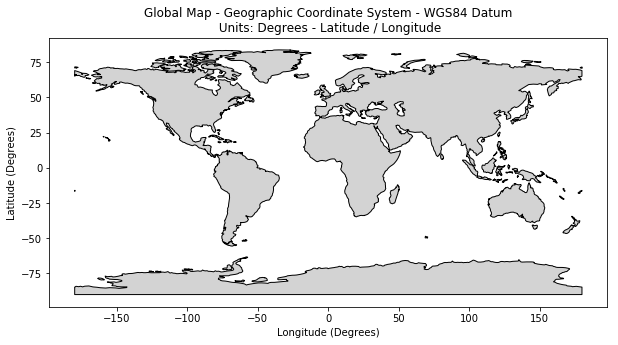

In [101]:
# path_root = '../../../../../../../'
# plot world boundary
ax = worldBound.plot(figsize=(10, 5), color='darkgrey')
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

Next, let's add three coordinate locations to our map. Note that the UNITS are
in decimal **degrees** (latitude, longitude):

* Boulder, Colorado:  40.0274, -105.2519
* Oslo, Norway: 59.9500, 10.7500
* Mallorca, Spain: 39.6167, 2.9833

Let's create a second map with the locations overlayed on top of the continental
boundary layer.


# what is the * doing before add_points below?

Whats happening below involves a numpy array of x,y locations. will have to be sure this is covered before...
# why does the plot text look so fuzzy?
## 1 -105.2519 40.0274
## 2   10.7500 59.9500
## 3    2.9833 39.6167

# why aren't the points located in the correct location? Also there are too many - this code isn't working as it should.

In [102]:
# create numpy array of x,y point locations
add_points = np.array([[-105.2519, 10.7500, 2.9833], 
                       [40.0274, 59.9500, 39.6167]])

# turn points into spatial object
geometry = [Point(xy) for xy in add_points.T]
city_locations = pd.DataFrame(geometry, columns=['geometry'])
city_locations = gpd.GeoDataFrame(city_locations, crs=worldBound.crs)


Finally we can plot the points on top of our world map.
Does it look right?

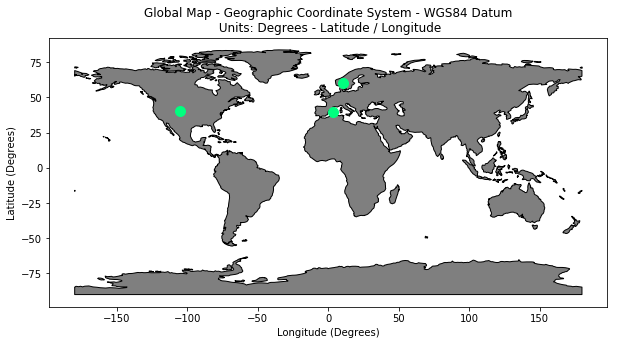

In [103]:
# plot point locations
ax = worldBound.plot(figsize=(10, 5), color='k')
city_locations.plot(ax=ax, color='springgreen', markersize=10)
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

# how do i adjust fonts for maps?
# how do i create a title and subtitle?

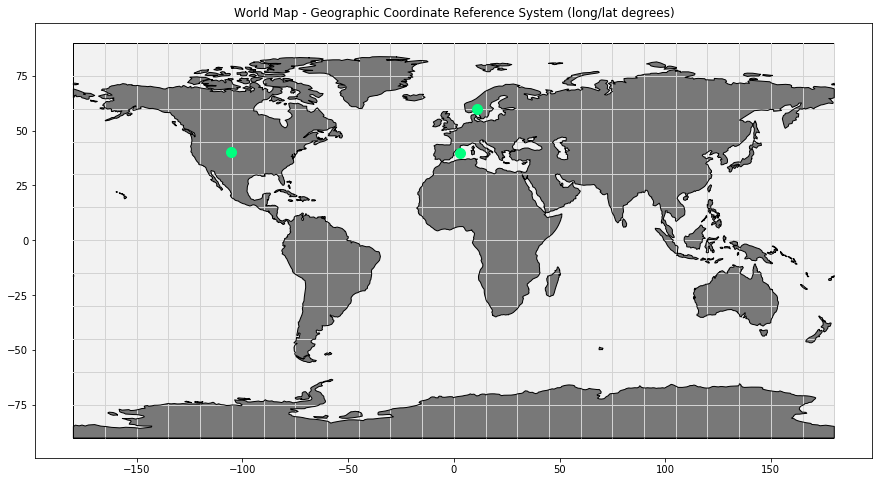

In [104]:
## import graticule & world bounding box shapefile data
graticule = gpd.read_file("data/week5/global/ne_110m_graticules_all/ne_110m_graticules_15.shp")
bbox = gpd.read_file("data/week5/global/ne_110m_graticules_all/ne_110m_wgs84_bounding_box.shp")

# Plot each map
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

bbox.plot(ax=ax, alpha=.1, color='grey')
graticule.plot(ax=ax, color='lightgrey')
worldBound.plot(ax=ax, color='black')
# add points to plot 
#ax.plot(add_points, 'o', color='springgreen', ms=10)
city_locations.plot(ax=ax, markersize=10, color='springgreen')
ax.set(title="World Map - Geographic Coordinate Reference System (long/lat degrees)")

## Geographic CRS - The Good & The Less Good

Geographic coordinate systems in decimal degrees are helpful when we need to
locate places on the Earth. However, latitude and longitude
locations are not located using uniform measurement units. Thus, geographic
CRSs are not ideal for measuring distance. This is why other projected `CRS`
have been developed.

<figure>
	<a href="{{ site.baseurl }}/images/course-materials/earth-analytics/week-5/LatLongfromGlobeCenter-ESRI.gif">
	<img src="{{ site.baseurl }}/images/course-materials/earth-analytics/week-5/LatLongfromGlobeCenter-ESRI.gif" alt="Graphic showing lat long as it's placed over the globe by ESRI."></a>
	<figcaption>A geographic coordinate system locates latitude and longitude
	location using angles. Thus the spacing of each line of latitude moving north
	and south is not uniform.
	Source: ESRI
	</figcaption>
</figure>

## Projected CRS - Robinson

We can view the same data above, in another CRS - `Robinson`. `Robinson` is a
**projected** `CRS`. Notice that the country boundaries on the map - have a
different shape compared to the map that we created above in the `CRS`:
**Geographic lat/long WGS84**.

In [105]:
# having the graticules makes the map easier to view - the different projectsion

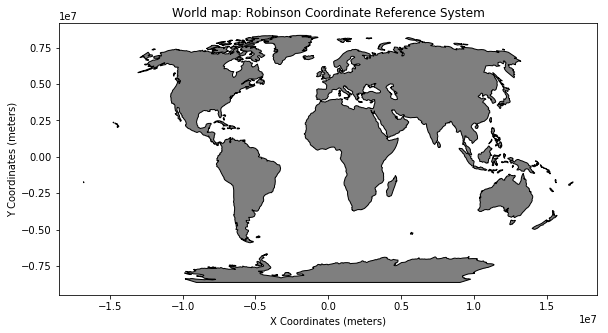

In [106]:
worldBound_robin = worldBound.to_crs('+proj=robin')
ax = worldBound_robin.plot(figsize=(10, 5), color='k')
ax.set(title="World map: Robinson Coordinate Reference System", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")



What happens if we add the same Lat / Long coordinate locations that
we used above, to our map? Remember that the data on our map are in 
the `CRS` - `Robinson`.

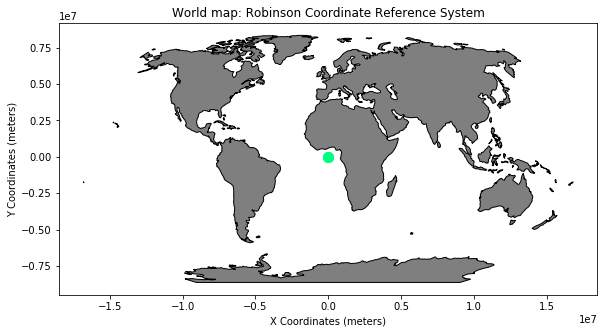

In [107]:
ax.plot(*add_points, 'o', color='springgreen', ms=10)
ax.figure

Notice above that when we try to add lat/long coordinates in degrees, to a map
in a different `CRS`, the points are not in the correct location. We need
to first convert the points to the same CRS that our other data are in.
The process of converting a dataset from one CRS to another is often referred
to as **reprojection**. 

In python, we can use the `.to_crs` method to reproject our data.


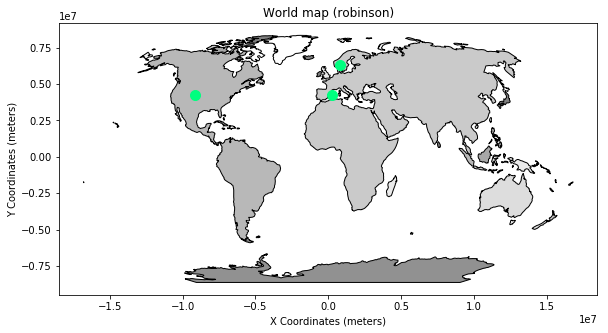

In [108]:
# reproject point locations to the Robinson projection
city_locations_robin = city_locations.to_crs(worldBound_robin.crs)

# Plot the reprojected data 
ax = worldBound_robin.plot(figsize=(10, 5), cmap='Greys')
ax.set(title="World map (robinson)", xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")
city_locations_robin.plot(ax=ax, markersize=10, color='springgreen')




## Compare Maps

Both of the plots above look visually different and also use a different
coordinate system. Let's look at both, side by side, with the actual **graticules**
or latitude and longitude lines rendered on the map.


## Note that below reproject uses the simplified proj 4 approache whereas above we used another layer to reproject. Should be consistent throughout and then have a breakout about how you can also reproject using +proj...
# add points to both maps below?


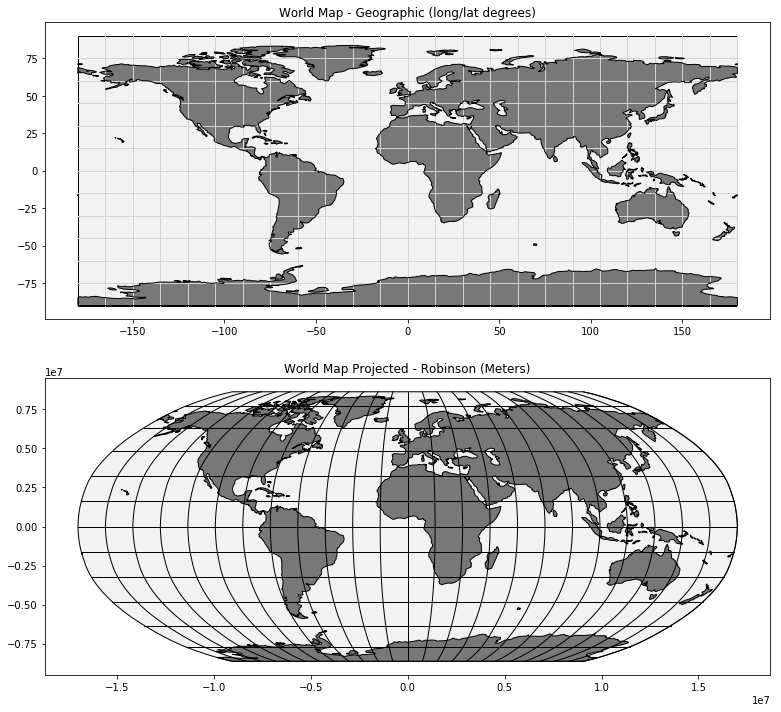

In [109]:
# reproject graticules and bounding box  to robinson
graticule_robinson = graticule.to_crs('+proj=robin')
bbox_robinson = bbox.to_crs('+proj=robin')

# Plot each map
fig, axs = plt.subplots(2, 1, figsize=(13, 12))

ax = axs[0]
bbox.plot(ax=ax, alpha=.1, color='grey')
graticule.plot(ax=ax, color='lightgrey')
worldBound.plot(ax=ax, color='k')
ax.set(title="World Map - Geographic (long/lat degrees)")

ax = axs[1]
bbox_robinson.plot(ax=ax, alpha=.1, color='grey')
graticule_robinson.plot(ax=ax, color='k')
worldBound_robin.plot(ax=ax, color='k')
_ = ax.set(title="World Map Projected - Robinson (Meters)")

Let's add the points to the map

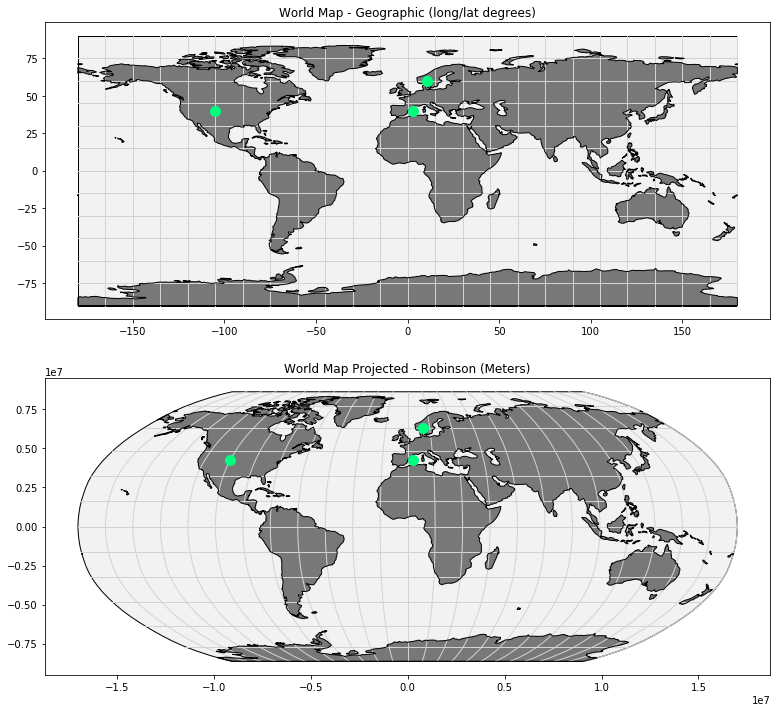

In [111]:
# reproject graticules and bounding box  to robinson
graticule_robinson = graticule.to_crs('+proj=robin')
bbox_robinson = bbox.to_crs('+proj=robin')

# Plot each map
fig, axs = plt.subplots(2, 1, figsize=(13, 12))

ax = axs[0]
bbox.plot(ax=ax, alpha=.1, color='grey')
graticule.plot(ax=ax, color='lightgrey')
worldBound.plot(ax=ax, color='k')
city_locations.plot(ax=ax, color='springgreen', markersize=10)
ax.set(title="World Map - Geographic (long/lat degrees)")

ax = axs[1]
bbox_robinson.plot(ax=ax, alpha=.1, color='grey')
graticule_robinson.plot(ax=ax, color='lightgrey')
worldBound_robin.plot(ax=ax, color='k')
city_locations_robin.plot(ax=ax, color='springgreen', markersize=10)
_ = ax.set(title="World Map Projected - Robinson (Meters)")

## Why Multiple CRS?

You may be wondering, why bother with different CRSs if it makes our
analysis more complicated? Well, each `CRS` is optimized to best represent the:

* shape and/or
* scale / distance and/or
* area

of features in the data. And no one CRS is great at optimizing all three elements: shape, distance AND
area. Some CRSs are optimized for shape, some are optimized for distance and
some are optimized for area. Some
CRSs are also optimized for particular regions -
for instance the United States, or Europe. Discussing `CRS` as it optimizes shape,
distance and area is beyond the scope of this tutorial, but it's important to
understand that the `CRS` that you chose for your data, will impact working with
the data.

We will discuss some of the differences between the projected UTM CRS and geographic
WGS84 in the next lesson.

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional challenge

1. Compare the maps of the globe above. What do you notice about the shape of the
various countries. Are there any signs of distortion in certain areas on either
map? Which one is better?

2. Look at the image below which depicts maps of the United States in 4 different
`CRS`s. What visual differences do you notice in each map? Look up each projection
online, what elements (shape,area or distance) does each projection used in
the graphic below optimize?

</div>

***

<figure>
    <a href="{{ site.url }}/images/course-materials/earth-analytics/week-5/different_projections.jpg">
    <img src="{{ site.url }}/images/course-materials/earth-analytics/week-5/different_projections.jpg" alt="Maps of the United States in different CRS including Mercator
    (upper left), Albers equal area (lower left), UTM (Upper RIGHT) and
    WGS84 Geographic (Lower RIGHT).">
    </a>

    <figcaption>Maps of the United States in different CRS including Mercator
    (upper left), Albers equal area (lower left), UTM (Upper RIGHT) and
    WGS84 Geographic (Lower RIGHT).
    Notice the differences in shape and orientation associated with each
    CRS. These differences are a direct result of the
    calculations used to "flatten" the data onto a two dimensional map.
    Source: opennews.org</figcaption>
</figure>


## Geographic vs. Projected CRS

The above maps provide examples of the two main types of coordinate systems:

1. **Geographic coordinate systems:** coordinate systems that span the entire
globe (e.g. latitude / longitude).
2. **Projected coordinate Systems:** coordinate systems that are localized to
minimize visual distortion in a particular region (e.g. Robinson, UTM, State Plane)

We will discuss these two coordinate reference systems types in more detail
in the next lesson.

<div class="notice--info" markdown="1">

## Additional Resources

* Read more on coordinate systems in the
<a href="http://docs.qgis.org/2.0/en/docs/gentle_gis_introduction/coordinate_reference_systems.html" target="_blank" data-proofer-ignore=''>
QGIS documentation.</a>
* <a href="http://neondataskills.org/GIS-spatial-data/Working-With-Rasters/" target="_blank">The Relationship Between Raster Resolution, Spatial extent & Number of Pixels - in R - NEON</a>
* For more on types of projections, visit
<a href="http://help.arcgis.com/en/arcgisdesktop/10.0/help/index.html#/Datums/003r00000008000000/" target="_blank"> ESRI's ArcGIS reference on projection types.</a>.
* Read more about <a href="https://source.opennews.org/en-US/learning/choosing-right-map-projection/" target="_blank"> choosing a projection/datum.</a>
</div>

# note this is the answer to the above question so it needs to be hidden...
Maybe we can simply comment out using html - especially if the repo is private we can hide answers that way...

<!--
## notes about robinson -- you will see distortion above 40 = 45 degrees latitude
## it is optimized for the latitudes between 0-45 (north and south).

## geographic - notice that the latitude lines are closer together are you move
## north...

# What each CRS optimizes:
## Mercator:
## ALbers Equal Area
## UTM Zone 11n
## Geographic WGS84 (lat/lon):
-->
